# Стратегия удержания для фитнес-центров «Культурист-датасаентист»

## Описание задачи

### Общие сведения

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

### Цель проекта

**Цель:** — провести анализ и подготовить план действий по удержанию клиентов.

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

### Исходные данные

Путь к файлу: `/datasets/gym_churn.csv`

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

Целевой признак:
- 'Churn' — факт оттока в текущем месяце.

### План проекта

- Исследовательский анализ даных
    - Первичный обзор данных
    - Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался
    - Изучение распределения признаков тех, кто ушел в отток и тех, кто остался
    - Анализ корреляции признаков
- Создание модели прогнозирования оттока
    - Подготовка данных
    - Обучение нескольких моделей (Логистическая регрессия, Random Forest, CatBoost, LightGBM, XGBoost)
    - Выбор лучшей модели. Доработка модели
    - Интерпретация модели
- Кластеризация клиентской базы
    - Подготовка данных
    - Матрица расстояний, анализ дендрограммы
    - Модель кластеризации на основании алгоритма K-Means
    - Средние значения признаков для кластеров
    - Изучение распределений признаков для кластеров
    - Изучение доли оттока в каждом кластере
- Основные выводы и рекомендации

## Стартовые параметры и ввод данных 

In [1]:
# устноавка нестандартных библиотек

! pip install phik --quiet
! pip install catboost --quiet
! pip install xgboost --quiet
! pip install lightgbm --quiet
! pip install shap --quiet

In [2]:
# Подключаем необходимые библиотеки 

import pandas as pd
pd.options.mode.chained_assignment = None # чтобы пофиксить ошибку при масштабировании данных в sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

from catboost import cv as catb_cv
from catboost import Pool
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm

import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,
                             roc_auc_score, roc_curve, recall_score, precision_score)

import phik
import shap

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format # отображать 2 знака после запятой
pd.options.display.max_columns = 50 # отображать до 50 колонок 
pd.set_option('display.max_colwidth', 130) # увеличиваем максимальную ширину столбца, чтобы видеть больше данных (будут адреса)

In [3]:
# Вводим классы для возможности лучшей визуализации
class color:
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# Функция загрузки данных из csv. 
# На вход функция принимает два варианта пути (локальный/сервер). Загрузка происходит из доступного.
# Нам известно, что колонка с индексом 0 содержит индексы
def import_data(pth_1, pth_2):
    if os.path.exists(pth_1):
        return pd.read_csv(pth_1, sep=',', parse_dates=True)
    elif os.path.exists(pth_2):
        return pd.read_csv(pth_2, sep=',', parse_dates=True)
    else:
        print('Загрузка данных неудачно. Нужно проверить, что пошло не так.')

In [5]:
# Загружаем данные из 3-х источников
df = import_data('/datasets/gym_churn.csv', r'C:\Python\ML_fitnes\gym_churn.csv')

In [6]:
# Смотрим загруженные данные
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


## Исследовательский анализ данных

### Основные функции этапа

#### Фуникция первичного знакомства с данными

In [7]:
# Фуникция первичного знакомства с данными
# Функция, которая сразу выводит всю информацию, принимая на вход название датасета
def data_view(data):
    #Сразу приводим названия всех колонок к змеиному регистру.    
    data.columns = data.columns. \
                                str.replace(r'([a-z0-9])([A-Z])' , r'\1_\2', regex = True). \
                                str.replace(r'(.)([A-Z][a-z]+)', r'\1_\2', regex = True). \
                                str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex = True). \
                                str.replace(r'__([A-Z])', r'_\1', regex = True). \
                                str.replace(r'__([a-z0-9])', r'_\1', regex = True)
    data.columns = data.columns.str.lower()
    print()
    print(color.BLUE + color.BOLD + 'Первые 5 строк данных' + color.END)
    display(data.head()) # Выводим первые 5 строк
    print()
    print(color.BLUE + color.BOLD + 'Последние 5 строк данных' + color.END)
    display(data.tail()) # Выводим последние 5 строк
    print()
    print(color.BLUE + color.BOLD + 'Информация по датасету' + color.END)
    print()
    display(data.info()) # Выводим инфо по датасету
    print()
    # Уточняем количество пропусков по столбцам. Берем сумму пропусков и процентную долю пропусков
    print(color.BLUE + color.BOLD + 'Пропуски и уникальные значения (без учета пропусков)' + color.END)
    display(pd.concat([data.isna().sum().rename('nan_count'), 
                       data.isna().mean().rename('nan_percent'),
                       data.nunique().rename('unique_values')], 
                      axis=1).style.format({'nan_percent' : '{:.2%}'})) 
    print()    
    print(color.BLUE + color.BOLD + 'Дубликаты' + color.END)
    print()
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Доля явных дубликатов в данных: {:.2%}'.format((data.duplicated().sum())/len(data)))

#### Фуникция подсчета пустых значений

In [8]:
# Фуникция подсчета пустых значений
def nan_count(data):
    # Уточняем количество пропусков по столбцам. Берем сумму пропусков и процентную долю пропусков
    print(color.BLUE + color.BOLD + 'Пропуски и уникальные значения (без учета пропусков)' + color.END)
    display(pd.concat([data.isna().sum().rename('nan_count'), 
                       data.isna().mean().rename('nan_percent'),
                       data.nunique().rename('unique_values')], 
                      axis=1).style.format({'nan_percent' : '{:.2%}'}))     

#### Фуникция визуализации распределения значений

In [9]:
# Функция строит гистограммы. На вход принимает датасет и кол-во столбцов в subplot
def show_hist(df, columns, k_height):
    # задаем размер графика
    plt.figure(figsize=(17, df.columns.nunique()*k_height))
    # перебираем все параметры-колонки
    for i, col in enumerate(df.columns):
        # для наглядности выводим гистограммы в subplot. Параметр позиции вывода берем +1, т.к. индексы в i идут с 0
        df[col].hist(bins=30, ec='black', alpha=0.5,  
                          ax=plt.subplot(int(df.columns.nunique()/columns+1), columns, i+1)) 
        # рисуем отметку среднего
        plt.axvline(df[col].describe()['mean'], color='r', 
                    linestyle='dashed', linewidth=2, label='mean={:.2f}'.format(df[col].describe()['mean']))
        # рисуем отметку медианы + выводим ее количественное значение
        plt.axvline(df[col].describe()['50%'], color='b', 
                    linestyle='dotted', linewidth=2, label='median={:.2f}'.format(df[col].describe()['50%'])) 
        plt.legend(fontsize = 12)
        plt.title(f'{col}', fontsize = 14)
        if df[col].nunique() == 2:
            plt.xticks([0, 1])
    plt.tight_layout()
    plt.show()

#### Фуникция визуализации распределения значений kde с группировкой

In [89]:
# Функция строит гистограммы. На вход принимает датасет и кол-во столбцов в subplot
def show_hist_churn(df, columns, k_height):
    # задаем размер графика
    plt.figure(figsize=(17, df.columns.nunique()*k_height))
    # перебираем все параметры-колонки
    for i, col in enumerate(df.drop('churn', axis=1).columns):
        # для наглядности выводим гистограммы в subplot. Параметр позиции вывода берем +1, т.к. индексы в i идут с 0
        ax=plt.subplot(int(df.columns.nunique()/columns)+1, columns, i+1)
        sns.histplot(data=df, x=col, hue='churn', multiple="stack", kde=True, stat="density", linewidth=0) 
        # рисуем отметку среднего
        plt.axvline(df.loc[df['churn']==0, col].describe()['mean'], color='b', 
                    linestyle='dashed', linewidth=2, label='Ушли')
        # рисуем отметку медианы + выводим ее количественное значение
        plt.axvline(df.loc[df['churn']==1, col].describe()['50%'], color='r', 
                    linestyle='dashed', linewidth=2, label='Нет')
        sns.color_palette("tab10")
        sns.set_style('whitegrid')
        plt.legend(title='Признак оттока', 
                   labels=['Ушли', 
                           'Остались', 
                           '0_mean: {:.2f}'.format(df.loc[df['churn']==0, col].describe()['mean']), 
                           '1_mean: {:.2f}'.format(df.loc[df['churn']==1, col].describe()['mean'])], 
                   fontsize=12)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f'{col}', fontsize = 14) 
        if df[col].nunique() == 2:
            plt.xticks([0, 1])
    plt.tight_layout()
    plt.show()

#### Функция оптимизации занимаемой памяти

In [11]:
def mem_usage(pandas_obj):
    '''Функция, измеряющая объем памяти, занимаемый датафреймом'''
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 # преобразуем байты в килобайты
    return round(usage_mb, 2)

In [12]:
def data_optimize(df, object_option=False):
    '''
    Функция сокращающая объем занимаемой памяти входящего в нее датафрейма
    
    параметры
    ----------
    df: входящий датафрейм для оптимизации
    object_option : принимает значения True и False
        в случае true, конвертирует object в category
        
    возвращает
    -------
    df: датафрейм с оптимизированными типами данных
    '''

    print(color.BOLD + f'Объем памяти, занимаемый датафреймом до оптимизации {mem_usage(df)} Kb' + color.END)
    for col in df.columns:
        # для столбцов с типом данных int пробегаем и смотрим максимальное значение, оптимизируем тип
        if df[col].dtype == 'int':
            col_min = df[col].min()
            col_max = df[col].max()
            if col_min >= 0:
                if col_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif col_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                else:
                    df[col] = df[col]
            else:
                if col_max < np.iinfo(np.int8).max and col_min > np.iinfo(np.int16).min:
                    df[col] = df[col].astype(np.int8)
                elif col_max < np.iinfo(np.int16).max and col_min > np.iinfo(np.int16).min:
                    df[col] = df[col].astype(np.int16)
                elif col_max < np.iinfo(np.int32).max and col_min > np.iinfo(np.int32).min:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col]
                    
        # для столбцов с типом данных float пробегаем и смотрим максимальное значение, оптимизируем тип
        elif df[col].dtype == 'float':
            col_min = df[col].min()
            col_max = df[col].max()
            if col_min > np.finfo(np.float32).min and col_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col]

        if object_option:
            if df[col].dtype == 'object':
                if len(df[col].value_counts()) < 0.5 * df.shape[0]:
                    df[col] = df[col].astype('category')
    print(color.BOLD + color.BLUE + f'Объем памяти, занимаемый датафреймом после оптимизации {mem_usage(df)} Mb' + color.END)
    return df.info()

### Знакомство с данными

Смотрим загруженные данные

In [13]:
# Используем функцию data_view для знакомства с загруженными данными
data_view(df)


Первые 5 строк данных


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0



Последние 5 строк данных


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0
3999,1,0,1,0,0,12,1,30,178.86,12.00,1,1.10,1.04,0



Информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total      

None


Пропуски и уникальные значения (без учета пропусков)


,nan_count,nan_percent,unique_values
gender,0,0.00%,2
near_location,0,0.00%,2
partner,0,0.00%,2
promo_friends,0,0.00%,2
phone,0,0.00%,2
contract_period,0,0.00%,3
group_visits,0,0.00%,2
age,0,0.00%,23
avg_additional_charges_total,0,0.00%,4000
month_to_end_contract,0,0.00%,12



Дубликаты

Количество явных дубликатов: 0
Доля явных дубликатов в данных: 0.00%


**Наблюдения:**
- В нашем датасете всего 4000 наблюдений. Для модели это очень немного
- Данные достаточно чистые - нет дублей и пропусков
- У нас 13 фичей и 1 целевой признак `churn`. Категориальные фичи отсутствуют, только числовые данные. Есть ряд признаков, которые принимают только булево значение (0/1), но имеют избыточный тип данных float64. Оптимизация не помешает.

### Анализ количественных данных

In [14]:
# У нас много признаков, поэтому развернем describe() и отобразим все строки по кол-ву признаков
#pd.set_option('display.max_rows', df.shape[0]+1)
display(df.describe().T)
#pd.set_option('display.max_rows', 20)

,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


**Наблюдения:**
- Мы видим значительные различия в масштабах числовых данных. Сильно выбиваются признаки `avg_additional_charges_total` и `age`.
- Часть признаков, как отмечалось ранее, бинарны. Однако при этом среднее значение и стандартное отклонение у них различны, а значит они по-разному будут влиять на предсказания таргета.
- У некоторых признаков (например lifetime и month_to_end_contract) медианные значения сильно отличаются от максимальных. Могут быть выбросы.

Посмотрим визуально распределение количественных признаков:

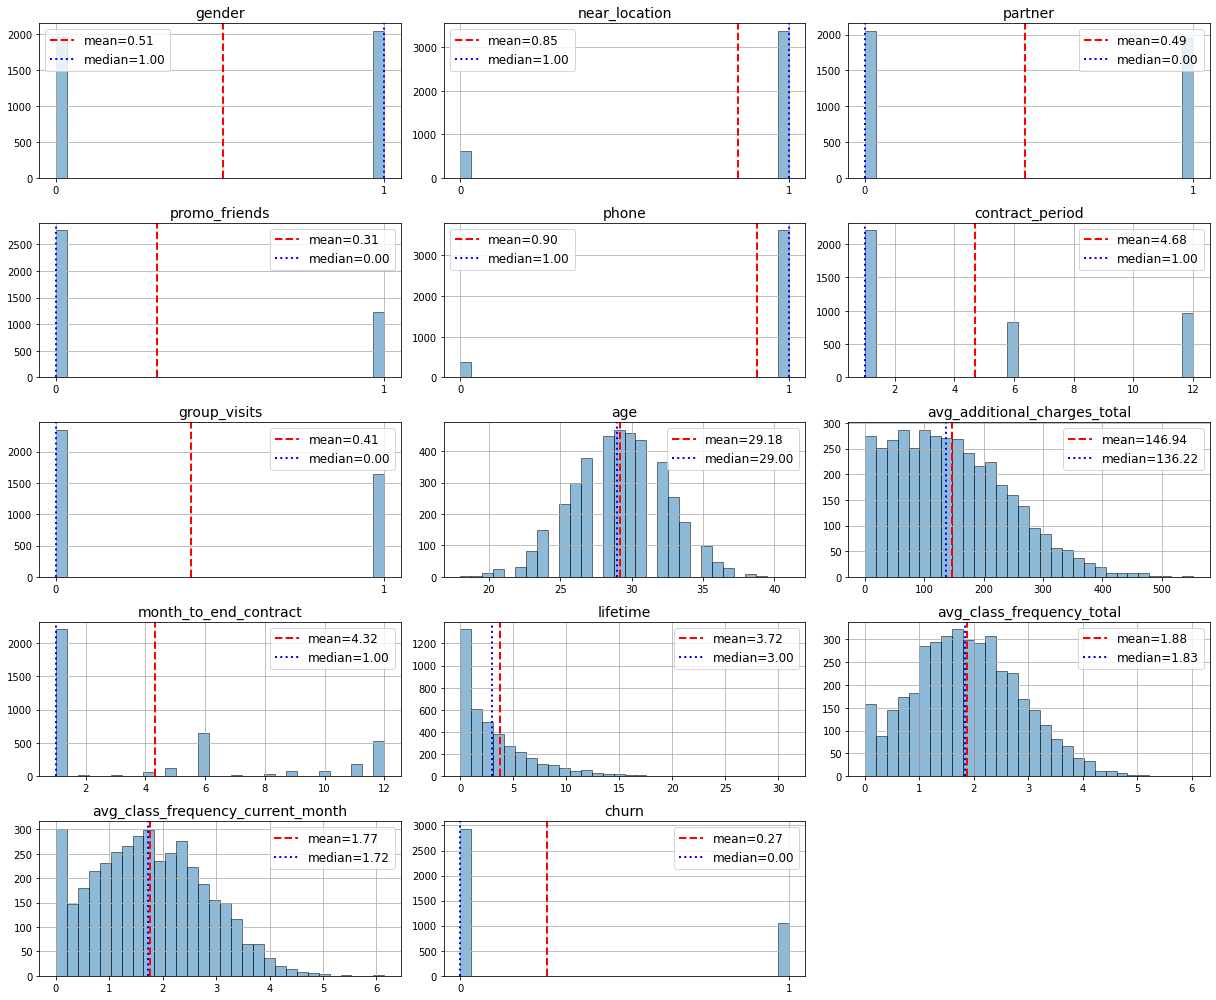

In [15]:
# используем написанную выше функцию
show_hist(df, 3, 1)

**Наблюдения:**
- Наблюдения сделанные по таблице describe подтвердились. Бинарные признаки в своем распределении отличаются друг от друга. Хотя есть весьма схожие.
- Есть пики в нуле по посещениям за неделю и посещениям за месяц. Эти признаки должны коррелировать с таргетом.
- В показателе lifetime похоже присутствуют выбросы.
- Виден явный дисбаланс классов в целевом признаке.

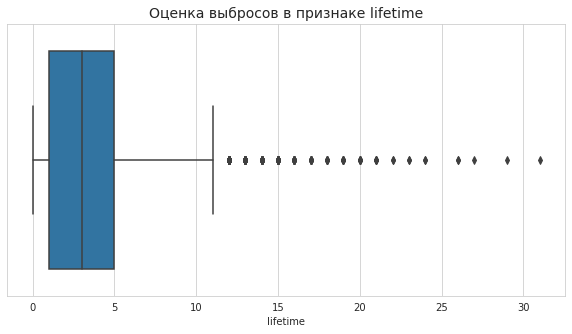

Перцентили 90, 95, 99 признака lifetime составляют:
 [ 9. 11. 17.]


In [45]:
# Оценка выбросов в признаке lifetime
plt.figure(figsize=(10,5))
sns.boxplot(x=df['lifetime'])
plt.title('Оценка выбросов в признаке lifetime', fontsize=14)
plt.show()
# Посмотрим 90, 95 и 99 перцентили по колонке lifetime
print('Перцентили 90, 95, 99 признака lifetime составляют:\n', 
      np.percentile(df['lifetime'], [90, 95, 99]))

Получается у нас около 5% значений по lifetime являются нетипичными выбросами. Посмотрим отдельно на эти значения:

In [46]:
df[df['lifetime']<=np.percentile(df['lifetime'], 95)].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3808.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,3808.00,0.84,0.36,0.00,1.00,1.00,1.00,1.00
partner,3808.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,3808.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,3808.00,0.90,0.29,0.00,1.00,1.00,1.00,1.00
contract_period,3808.00,4.64,4.54,1.00,1.00,1.00,6.00,12.00
group_visits,3808.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,3808.00,29.16,3.27,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,3808.00,146.26,96.21,0.15,68.13,134.99,209.51,552.59
month_to_end_contract,3808.00,4.29,4.18,1.00,1.00,1.00,6.00,12.00


Данные выглядят хорошо, картина по остальным показателям вполне соответствует общей. Постоянные клиенты - это не проблема, это наоборот хорошо. Оставим все как есть.

### Оценка дисбаланса классов целевого признака

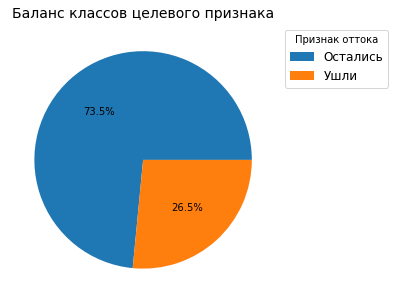

In [16]:
# визуализируем классы целевого признака
plt.figure(figsize=(5,5))
plt.pie(df['churn'].value_counts(), autopct='%.1f%%')
plt.title('Баланс классов целевого признака', fontsize=14)
plt.legend(title='Признак оттока', 
           labels=['Остались', 'Ушли'], 
           fontsize=12,
           bbox_to_anchor= (1, 1))
plt.show()

Положительный класс целевого признака составляет всего 26,5% от общего числа значений. на лицо явный дисбаланс классов.и

### Оптимизация данных

In [17]:
# Оптимизируем датасет с помощью написанной выше функции
data_optimize(df)

Объем памяти, занимаемый датафреймом до оптимизации 437.62 Kb
Объем памяти, занимаемый датафреймом после оптимизации 101.69 Mb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int8   
 1   near_location                      4000 non-null   int8   
 2   partner                            4000 non-null   int8   
 3   promo_friends                      4000 non-null   int8   
 4   phone                              4000 non-null   int8   
 5   contract_period                    4000 non-null   int8   
 6   group_visits                       4000 non-null   int8   
 7   age                                4000 non-null   int8   
 8   avg_additional_charges_total       4000 non-null   float32
 9   month_to_end_contract              4000 non-null   float3

### Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался

Рассмотрим более подробно распределение признаков с группировкой данных по таргету:

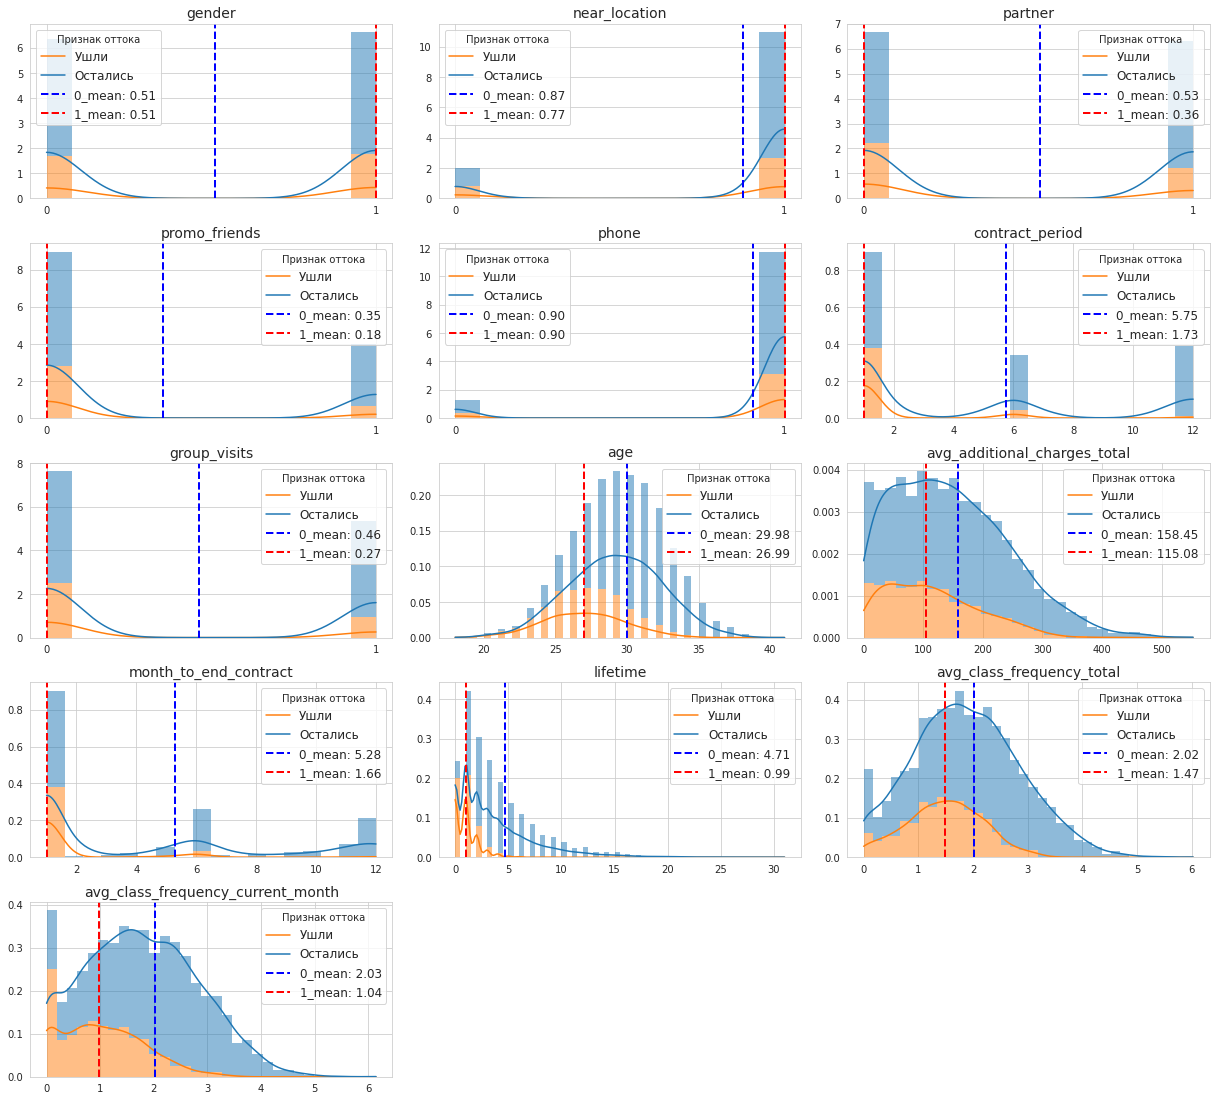

In [90]:
# Анализируем с помощью написанной выше функции
show_hist_churn(df, 3, 1.1)

**Наблюдения:**
- По гендерному признаку у нас практически паритет.
- Партнеры меньше склонны к оттоку.
- Более склонны к оттоку клиенты с коротким contract_period. Владельцы абонементов менее склонны к оттоку.
- Клиенты в возрасте 25-27 лет более склонны к оттоку. С отметки возраста 28 лет и выше склонность к оттоку снижается. Клиенты старше 34 лет менее всего склонны к оттоку.
- Клиенты с lifetime до 2 мес. имеют высокую склонность к оттоку. Далее склонность к оттоку снижается вплоть до отметки 5 мес. Клиенты с lifetime свыше 5 мес. практически не склонны к оттоку.

По ТЗ нас еще просят построить столбчатые диаграммы. Показываю, что тоже умею ниже )))

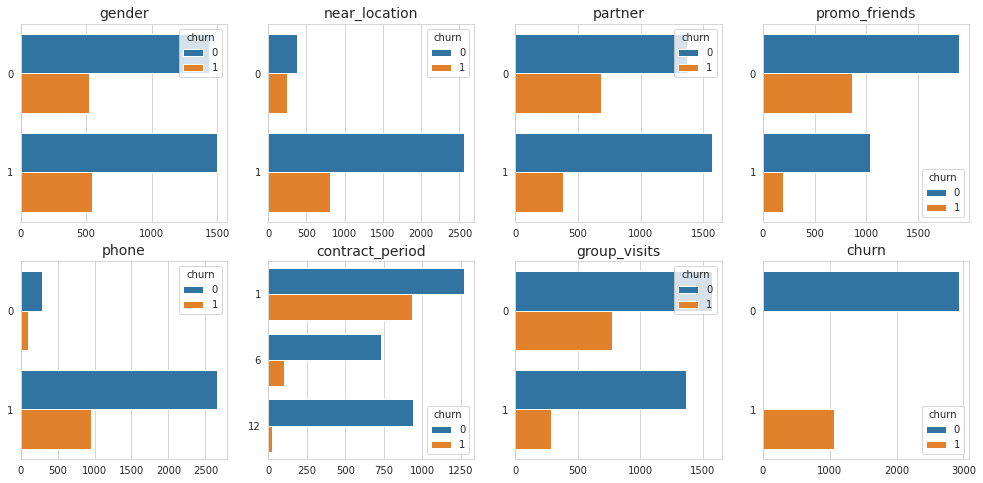

In [87]:
# Отбираем категориальные признаки
cat_columns = df[df.select_dtypes(np.int8).columns.to_list()].drop(['age','lifetime'], axis=1).columns

# визуализируем
plt.figure(figsize=(17, 8))
for i, col in enumerate(cat_columns):
    ax=plt.subplot(2, 4, i+1)
    sns.countplot(y=col, hue='churn', ax=ax, data=df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'{col}', fontsize = 14) 

plt.show()

### Изучение корреляции признаков

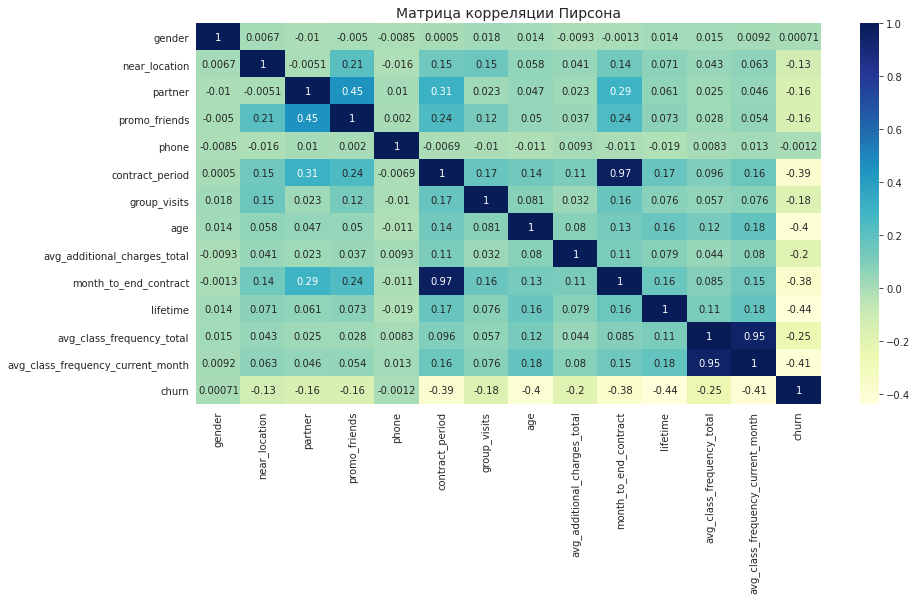

In [33]:
# Определяем индексы корреляции Пирсона 
corr_overview = df.corr()
# Визуализируем взаимосвязи
plt.figure(figsize=(14,7))
sns.heatmap(corr_overview, annot=True, cmap="YlGnBu")
plt.title('Матрица корреляции Пирсона', fontsize=14)
plt.show()

**Наблюдения:**
- Мы наблюдаем отрицательную корреляцию Пирсона средней силы для таргета и признаков: avg_class_frequency_month, lifetime, month_to_end_contract, age и contract_period.
- При этом признаки avg_class_frequency_total и avg_class_frequency_month очень сильно линейно связаны друг с другом. Аналогично для пары признаков month_to_end_contract и contract_period. Вероятно удаление одного из парных зависимых признаков не внесет значимых изменений в предсказательную силу модели, зато оптимизирует процесс обучения.

Хотя мы обучаем модель линейной регрессии, все же посмотрим наличие нелинейной корреляции:

interval columns not set, guessing: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


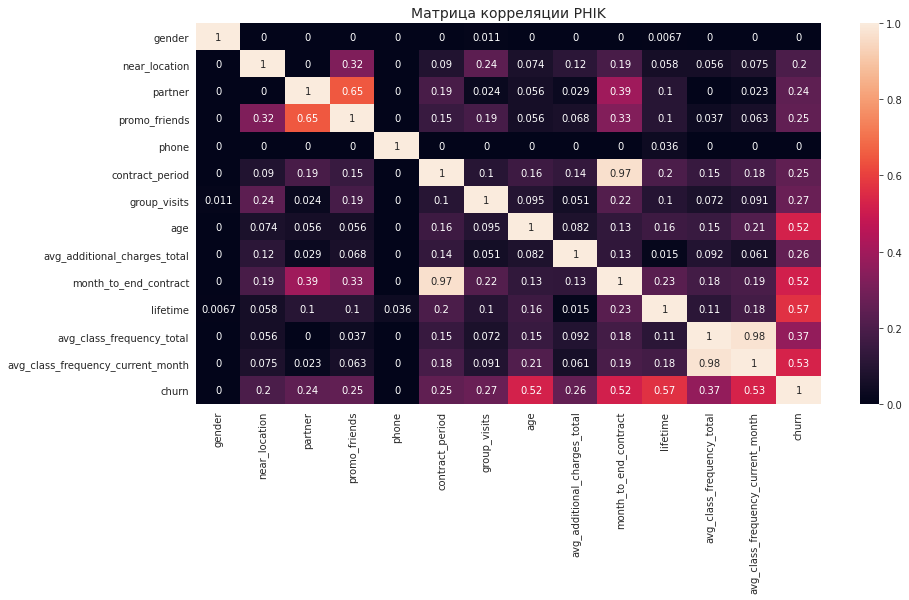

In [34]:
# Определяем индексы нелинейной корреляции
phik_overview = df.phik_matrix()
# Визуализируем взаимосвязи
plt.figure(figsize=(14,7))
sns.heatmap(phik_overview, annot=True)
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

**Наблюдения:**
- PHIK корреляция показывает более интересные закономерности. На первый план по значимости по аналогии с корреляцией Пирсона выходят признаки avg_class_frequency_month, lifetime, month_to_end_contract, age чуть в других скорах. Параметр contract_period менее значим.
- Мы наблюдаем отрицательную корреляцию Пирсона средней силы для таргета и признаков: avg_class_frequency_month, lifetime, month_to_end_contract, age и contract_period.
- Внутри пары признаков avg_class_frequency_total и avg_class_frequency_month и пары month_to_end_contract и contract_period наблюдается сильная взаимосвязь. 

## Создание модели прогнозирования оттока

### Подготовка данных

#### Разделение на train, valid, test


За неимением тетовой выборки мы будем разбивать исходные данные в соотношении 3:1. Размеры тестового и обучающего наборов обычно равны:
- обучающая выборка `75%`
- тетсовая выборка `25%`

Разделим выборки методом train_test_split. Изначальная выборка у нас небольшая, всего 4000 строк, поэтому применим стратификацию целевого параметра, чтобы в выборках было равноценное распределение.

In [92]:
X = df.drop(['churn'],axis=1) # отбираем признаки за исключением целевого
y = df['churn'] # извлеките целевой признак
# С помощью train_split_test отбираем данные для тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y) 

In [94]:
print()
print(color.BLUE + color.BOLD + 'Количество строк в изначальном датафрейме:'+ color.END, len(df))
print(color.GREEN + color.BOLD + 
      'Количество строк суммарно в обучающей и тестовой выборках:'+ color.END, 
      len(X_train)+len(X_test))


Количество строк в изначальном датафрейме: 4000
Количество строк суммарно в обучающей и тестовой выборках: 4000


Сумма количества случаев в обучающей, валидационной и тестовой выборках соответствует количеству случаев в оригинальном датафрейме. Ошибок нет.

Ранее мы выяснили, что у нас неравноценное распределение по тарифам в изначальных данных. Проверим, соблюдается ли соотношение в выделенных выборках.

In [96]:
print()
print(color.BLUE + color.BOLD + 'Соотношение актуалных/отточных клиентов в target_train:'+ color.END)
print(100 * y_train.value_counts(normalize=True))
print()
print(color.BLUE + color.BOLD + 'Соотношение актуалных/отточных клиентов в target_test:'+ color.END)
print(100 * y_test.value_counts(normalize=True))


Соотношение актуалных/отточных клиентов в target_train:
0   73.47
1   26.53
Name: churn, dtype: float64

Соотношение актуалных/отточных клиентов в target_test:
0   73.50
1   26.50
Name: churn, dtype: float64


Разделение данных успешно. Можно двигаться дальше.

#### Масштабирование признаков

In [100]:
# Сохраняем немасштабированные фичи. Они нам еще потребуются
X_train_st = X_train.copy()
X_test_st = X_test.copy()

Числовые данные в нашем датасете имеют разный масштаб. Чтобы исключить ложное влияние масштабов на результат обучения модели, применим масштабирование признаков с помощью метода `StandardScaler`

In [101]:
# Отбираем количественные признаки
numeric = ['contract_period', 'age', 'avg_additional_charges_total', 
           'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
           'avg_class_frequency_current_month']

# Применяем метод масштабирования 
scaler = StandardScaler()

# Масштабируем признаки
X_train_st[numeric] = scaler.fit_transform(X_train_st[numeric])
X_test_st[numeric] = scaler.fit_transform(X_test_st[numeric])

In [104]:
# Смотрим результат
print()
print('TRAIN')
display(X_train_st.head())
print()
print('TEST')
display(X_test_st.head())


TRAIN


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
153,1,1,0,0,1,-0.79,0,0.55,1.91,-0.78,-0.73,0.80,0.89
1248,0,1,1,1,1,0.32,1,-0.97,-1.28,0.42,0.06,0.29,0.37
2759,0,1,0,0,1,0.32,1,0.55,0.26,0.42,-0.73,0.80,0.77
3529,0,1,1,1,1,1.64,1,-0.36,-0.57,0.18,0.86,-0.33,-0.15
2119,0,1,0,0,1,-0.79,0,-0.97,-0.92,-0.78,-1.00,-1.93,-1.29



TEST


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
1799,1,0,1,0,1,-0.88,1,-0.05,-1.31,-0.86,0.95,-1.41,-1.20
2296,0,1,0,0,1,-0.88,1,-0.05,-0.52,-0.86,-0.71,1.01,1.04
1177,0,1,0,0,1,-0.88,0,0.58,-0.85,-0.86,-0.71,-0.83,-0.96
3375,1,1,1,0,1,1.48,0,-0.36,-0.92,1.04,-0.43,-0.08,-0.15
2206,0,1,1,1,1,1.48,0,-0.36,-0.03,0.56,0.40,0.60,0.61


Масштабирование успешно.

#### Борьба с дисбалансом классов

Для повышения качества моделей рекомендуется использовать балансировку классов, чтобы доли 0 и 1 были близки к 50%. Для этого можно применить следующие методы:
- class weight - увеличение весов редких классов
- upsampling - количественно увеличить представленность редкого класса
- downsampling - количественно уменьшить представленность доминирующего класса
- изменения порога значимости score - мы можем самостоятельно выбрать порог для положительного класса 

Веса классов нампотребуются для обучения Логистической регрессии. Во всех остальных моделях есть встроенный функционал для работы с дисбалансом классов, который прекрасно работает. Upsampling и downsampling мы в рамках данного проекта применять не будем, т.к. их результаты вряд ли превзойдут встроенные алгоритмы. А Логистическая регрессия слаба как модель сама по себе, поэтому не будем уделять ей много внимания.

Не во всех моделях есть взвешивание классов. Поэтому подготовим словарь с весами классов масостоятельно:

In [106]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cl_weights = dict(zip(classes, weights))
cl_weights

{0: 0.680561463207146, 1: 1.8845700824499412}

Взвешивание классов успешно. 

#### Удаление избыточных фичей

### Обучение моделей

- Создание модели прогнозирования оттока
    - Подготовка данных
    - Обучение нескольких моделей (Логистическая регрессия, Random Forest, CatBoost, LightGBM, XGBoost)
    - Выбор лучшей модели. Доработка модели
    - Интерпретация модели